In [47]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
import os
import curvedsky as cs
import pickle as pl

In [48]:
sys.path.append('../')

In [49]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering
from quest import Reconstruction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
rec = Reconstruction.from_ini('../LB_FG2.ini')
rec1 = Reconstruction.from_ini('../LB_FG2_n1.ini')


/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/N1/s1d1


In [41]:
rec.N1

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        9.72382000e-19, -8.11112866e-18, -2.55610902e-17])

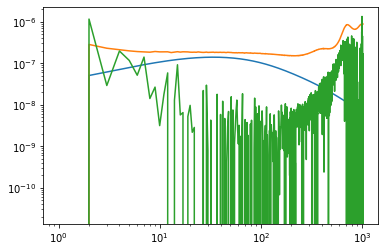

In [26]:
plt.loglog(rec.cl_pp*rec.Lfac)
plt.loglog(rec.MCN0()*rec.Lfac)
plt.loglog((rec.N1)*rec1.Lfac)

In [42]:
st = rec.get_qcl_wR_stat()

qcl stat:   0%|          | 0/400 [00:00<?, ?simulation/s]/global/u2/l/lonappan/workspace/LBlens/Notebooks/../quest.py:383: RuntimeWarning: invalid value encountered in true_divide
  
qcl stat: 100%|██████████| 400/400 [01:13<00:00,  5.44simulation/s]


In [37]:
n1b = rec.bin_cell(rec.N1*rec.Lfac)

In [29]:
n1b

array([ 5.49400073e-08,  2.27974251e-09,  2.67664133e-10,  1.02950292e-09,
        2.22346868e-09,  3.35794816e-09,  4.01391610e-09,  5.48142561e-09,
        8.06359787e-09,  8.63899291e-09,  1.02239714e-08,  1.75167283e-08,
        2.13180766e-08,  2.64612534e-08,  3.56600768e-08,  5.70344424e-08,
        8.12329000e-08,  1.30949611e-07,  1.84059097e-07,  2.15174954e-07,
        1.68191472e-07,  1.12218379e-07,  8.42831611e-08,  4.83888879e-08,
        1.73848851e-09, -1.32725032e-07, -3.33101683e-07, -6.59948774e-07,
       -9.81806436e-07, -1.41023853e-06])

(1e-08, 2e-07)

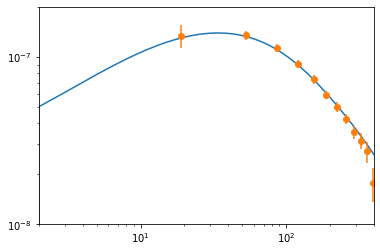

In [45]:
plt.loglog(rec.cl_pp*rec.Lfac)
plt.errorbar(rec.B,st.mean(axis=0),yerr=st.std(axis=0),fmt='o')
plt.xlim(2,400)
plt.ylim(1e-8,2e-7)

In [55]:
rec.SNR_phi()

qcl stat: 100%|██████████| 400/400 [00:34<00:00, 11.61simulation/s]


34.20616297811644